# credit card fraud detection system

# problem statement

## The objective is to develop a machine learning model to detect fraudulent transactions while handling the highly imbalanced nature of the dataset. Effective fraud detection can help financial institutions minimize financial losses and prevent unauthorized transactions. The challenge involves selecting relevant features, preprocessing the data, and optimizing a classification model to maximize fraud detection accuracy while reducing false positives.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.fftpack import fft
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

 ## Load and Inspect the Dataset

In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# df['datetime'].value_counts()

In [10]:
pd.to_datetime(df['Time'], unit='s')

0        1970-01-01 00:00:00
1        1970-01-01 00:00:00
2        1970-01-01 00:00:01
3        1970-01-01 00:00:01
4        1970-01-01 00:00:02
                 ...        
284802   1970-01-02 23:59:46
284803   1970-01-02 23:59:47
284804   1970-01-02 23:59:48
284805   1970-01-02 23:59:48
284806   1970-01-02 23:59:52
Name: Time, Length: 284807, dtype: datetime64[ns]

In [11]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
import pandas as pd
import numpy as np

# Basic info
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Rows:\n", df.head())

Dataset Shape: (284807, 31)

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class   

## Outlier Detection and Treatment (IQR method)

In [14]:
file_path = 'creditcard.csv'  
df = pd.read_csv(file_path)

# Exclude categorical columns if any
numerical_columns = df.select_dtypes(include=['number']).columns

# Dictionary to store outliers
outliers = {}

# Detect outliers using IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers[col] = list(outlier_indices)

# Print the number of outliers per column
outlier_counts = {col: len(indices) for col, indices in outliers.items()}
print(outlier_counts)

{'Time': 0, 'V1': 7062, 'V2': 13526, 'V3': 3363, 'V4': 11148, 'V5': 12295, 'V6': 22965, 'V7': 8948, 'V8': 24134, 'V9': 8283, 'V10': 9496, 'V11': 780, 'V12': 15348, 'V13': 3368, 'V14': 14149, 'V15': 2894, 'V16': 8184, 'V17': 7420, 'V18': 7533, 'V19': 10205, 'V20': 27770, 'V21': 14497, 'V22': 1317, 'V23': 18541, 'V24': 4774, 'V25': 5367, 'V26': 5596, 'V27': 39163, 'V28': 30342, 'Amount': 31904, 'Class': 492}


##  Data Normalization

In [16]:
file_path = 'creditcard.csv'  
df = pd.read_csv(file_path)

# Handling Missing Values
# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Exclude categorical columns if any
numerical_columns = df.select_dtypes(include=['number']).columns

# Dictionary to store outliers
outliers = {}

# Detect and handle outliers using IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers[col] = list(outlier_indices)
    
    # Capping outliers within acceptable range
    df[col] = df[col].clip(lower_bound, upper_bound)

# Print the number of outliers per column
outlier_counts = {col: len(indices) for col, indices in outliers.items()}
print("Outlier Counts:", outlier_counts)

# Data Normalization using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the cleaned and normalized dataset
df.to_csv("cleaned_dataset.csv", index=False)
print("Dataset cleaned and normalized successfully.")


Outlier Counts: {'Time': 0, 'V1': 7062, 'V2': 13526, 'V3': 3363, 'V4': 11148, 'V5': 12295, 'V6': 22965, 'V7': 8948, 'V8': 24134, 'V9': 8283, 'V10': 9496, 'V11': 780, 'V12': 15348, 'V13': 3368, 'V14': 14149, 'V15': 2894, 'V16': 8184, 'V17': 7420, 'V18': 7533, 'V19': 10205, 'V20': 27770, 'V21': 14497, 'V22': 1317, 'V23': 18541, 'V24': 4774, 'V25': 5367, 'V26': 5596, 'V27': 39163, 'V28': 30342, 'Amount': 31904, 'Class': 492}
Dataset cleaned and normalized successfully.


## Class Distribution Visualization


Class Distribution:
 Class
0.0    284807
Name: count, dtype: int64
Fraud Percentage: 0.0 %


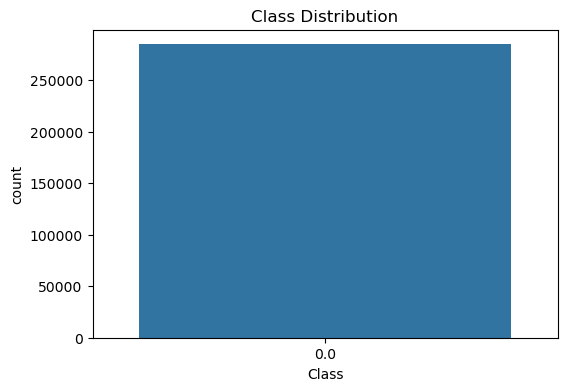

In [18]:
class_counts = df['Class'].value_counts()
print("\nClass Distribution:\n", class_counts)

# Use .get() to safely access the fraud count
fraud_count = class_counts.get(1, 0)  # Use get(1.0, 0) if values are float
fraud_percentage = (fraud_count / len(df)) * 100
print("Fraud Percentage:", round(fraud_percentage, 4), "%")

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [19]:
# Summary stats
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                 Time             V1             V2             V3  \
count  284807.000000  284807.000000  284807.000000  284807.000000   
mean        0.548717       0.646412       0.490642       0.494622   
std         0.274828       0.236988       0.200044       0.178660   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.313681       0.498419       0.375000       0.375000   
50%         0.490138       0.637880       0.493385       0.514528   
75%         0.806290       0.830698       0.625000       0.625000   
max         1.000000       1.000000       1.000000       1.000000   

                  V4             V5             V6             V7  \
count  284807.000000  284807.000000  284807.000000  284807.000000   
mean        0.503902       0.507120       0.520155       0.500131   
std         0.205822       0.206596       0.214806       0.192345   
min         0.000000       0.000000       0.000000       0.000000   
25%        

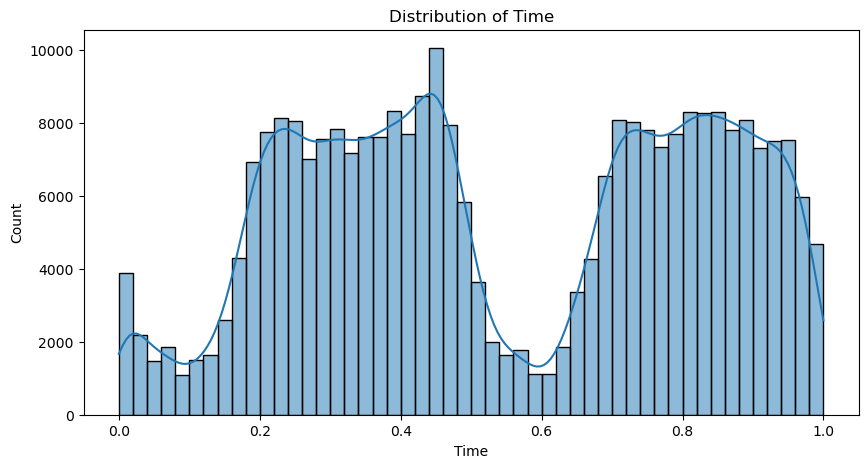

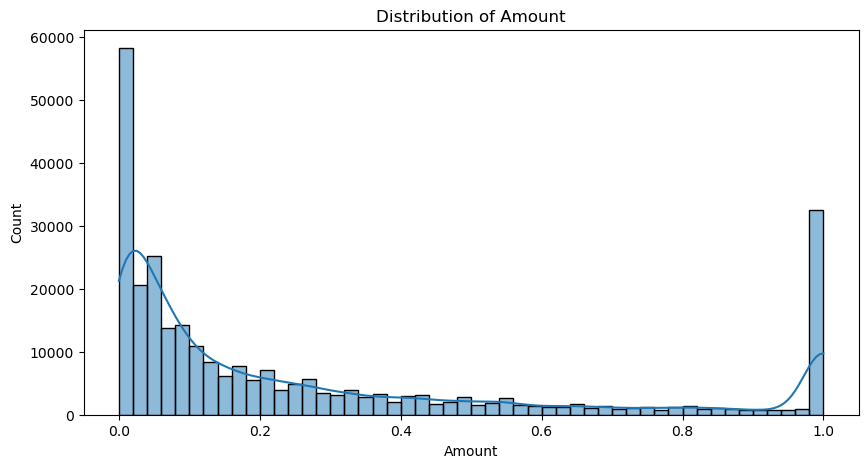

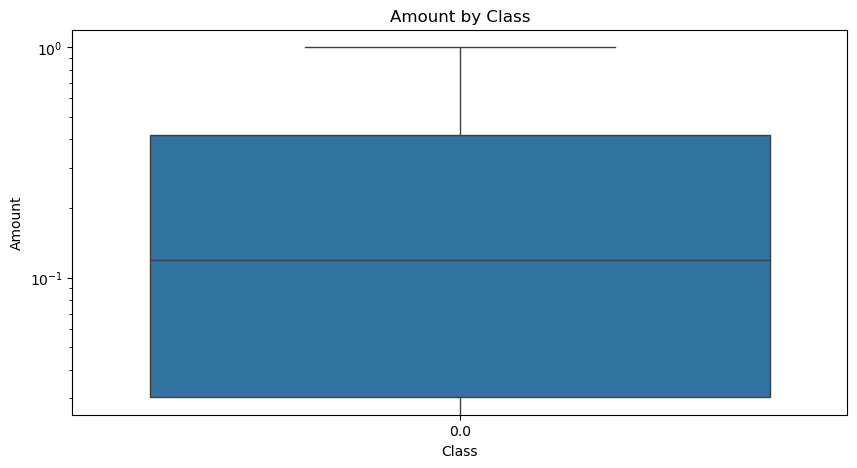

In [20]:
# Time distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Distribution of Time")
plt.show()

# Amount distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Amount")
plt.show()

# Amount by Class
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.yscale('log')  # Log scale due to skewness
plt.show()


## Correlation Heatmap


Correlations with Class:
 Time     NaN
V1       NaN
V2       NaN
V3       NaN
V4       NaN
V5       NaN
V6       NaN
V7       NaN
V8       NaN
V9       NaN
V10      NaN
V11      NaN
V12      NaN
V13      NaN
V14      NaN
V15      NaN
V16      NaN
V17      NaN
V18      NaN
V19      NaN
V20      NaN
V21      NaN
V22      NaN
V23      NaN
V24      NaN
V25      NaN
V26      NaN
V27      NaN
V28      NaN
Amount   NaN
Class    NaN
Name: Class, dtype: float64


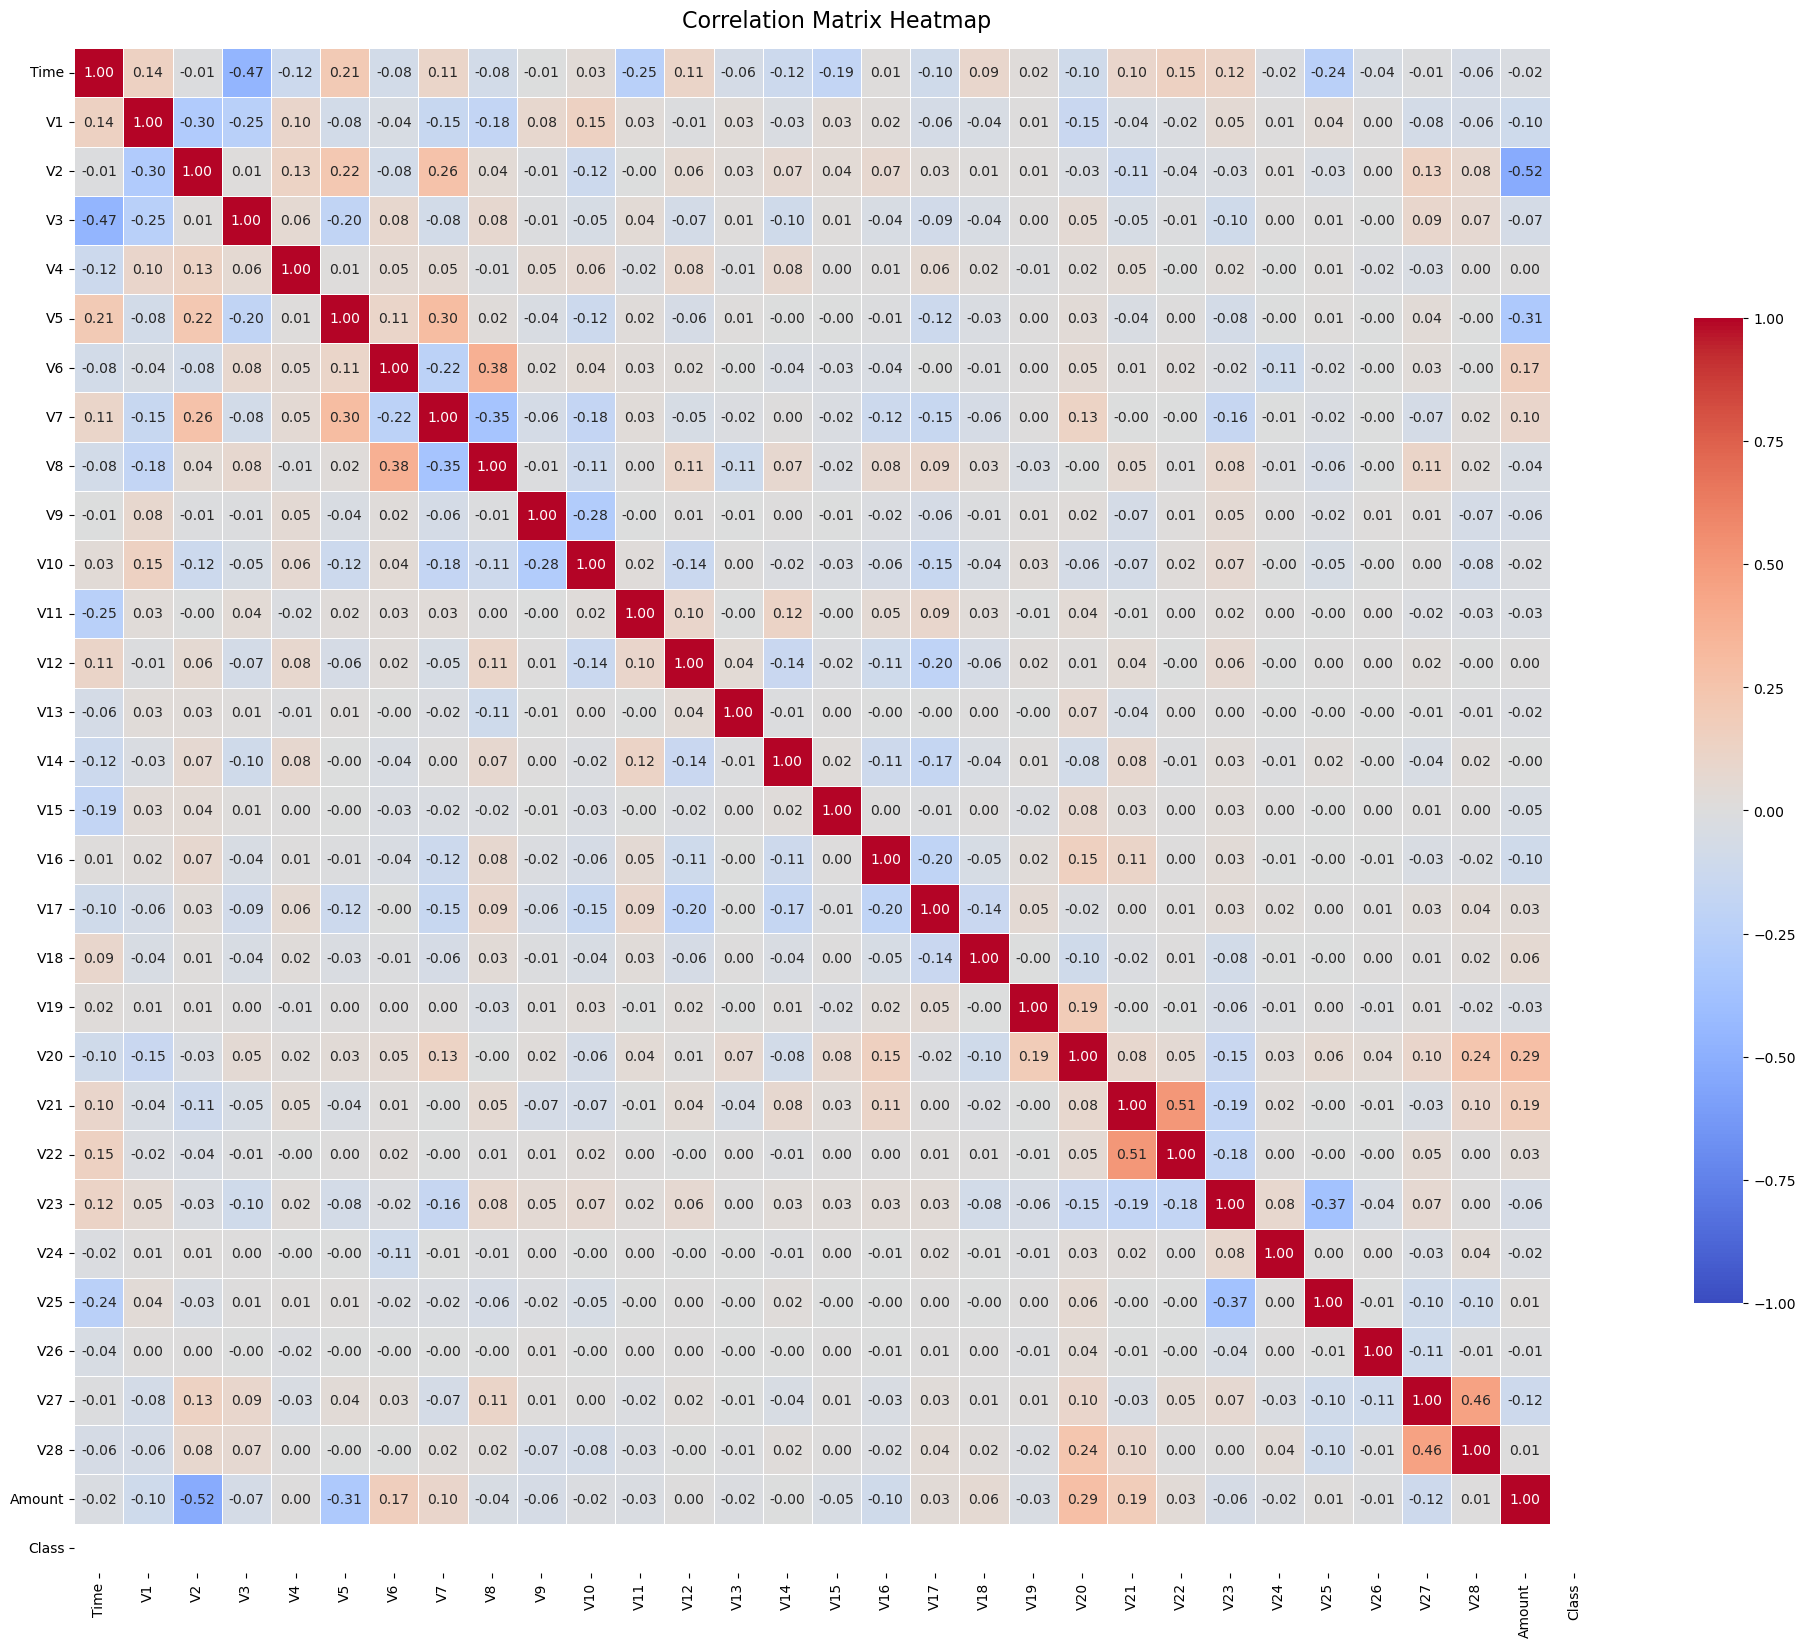

In [22]:
corr = df.corr()

# Print correlations with 'Class', sorted in descending order
print("\nCorrelations with Class:\n", corr['Class'].sort_values(ascending=False))

# Create the correlation heatmap
plt.figure(figsize=(20, 20))  # Set figure size
sns.heatmap(
    corr, 
    cmap='coolwarm',       # Color scheme (red-blue gradient)
    annot=True,            # Show correlation values in cells
    fmt='.2f',            # Format numbers to 2 decimal places
    vmin=-1, vmax=1,      # Set color scale range (-1 to 1)
    center=0,             # Center the colormap at 0
    square=True,          # Make the plot square-shaped
    linewidths=0.5,       # Add grid lines between cells
    cbar_kws={'shrink': .5}  # Customize color bar size
)

# Add title and adjust layout
plt.title("Correlation Matrix Heatmap", fontsize=16, pad=15)
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16044\4082426407.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Fraud', fill=True)


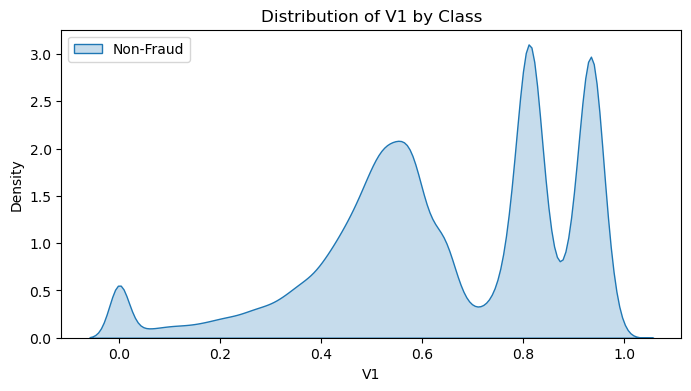

C:\Users\DELL\AppData\Local\Temp\ipykernel_16044\4082426407.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Fraud', fill=True)


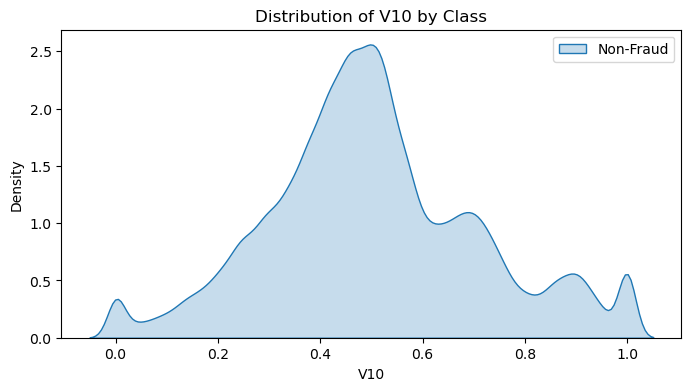

C:\Users\DELL\AppData\Local\Temp\ipykernel_16044\4082426407.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Fraud', fill=True)


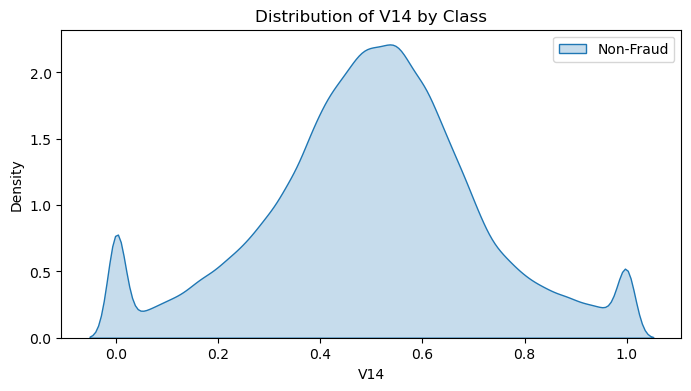

C:\Users\DELL\AppData\Local\Temp\ipykernel_16044\4082426407.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Fraud', fill=True)


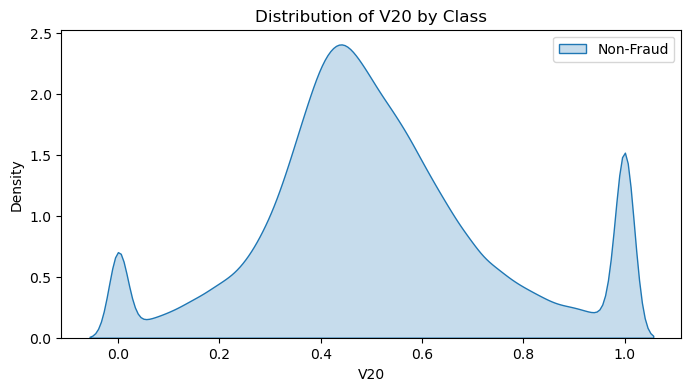

In [23]:
# Example for a few V features
features_to_plot = ['V1', 'V10', 'V14', 'V20']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df[df['Class'] == 0], x=feature, label='Non-Fraud', fill=True)
    sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Fraud', fill=True)
    plt.title(f"Distribution of {feature} by Class")
    plt.legend()
    plt.show()

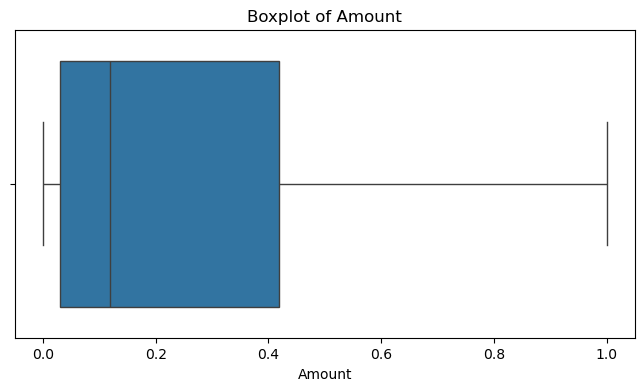


Number of Amount Outliers: 0


In [24]:
# Boxplot for Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Amount")
plt.show()

# IQR method for Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))]
print("\nNumber of Amount Outliers:", len(outliers))

## . Fourier Transform (FFT) on 'Amount'

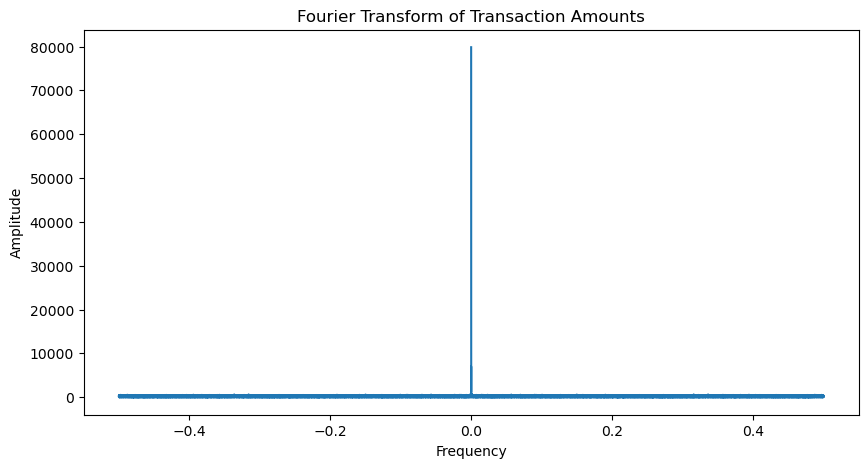

In [26]:
amounts = df["Amount"].values

# Apply FFT
amount_fft = fft(amounts)

# Compute frequencies
freqs = np.fft.fftfreq(len(amounts))

# Plot FFT results
plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(amount_fft))
plt.title("Fourier Transform of Transaction Amounts")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

## Feature Engineering with FFT (for time series)

In [28]:
# Function to compute FFT features per window
def compute_fft_features(signal, window_size=100):
    n = len(signal)
    fft_features = []
    for i in range(0, n - window_size + 1, window_size // 2):  # Overlapping windows
        window = signal[i:i + window_size]
        fft_result = np.fft.fft(window)
        fft_magnitude = np.abs(fft_result)[:window_size // 2]  # Positive frequencies
        fft_features.append([np.mean(fft_magnitude), np.max(fft_magnitude), np.sum(fft_magnitude**2)])
    return np.array(fft_features)

# Apply FFT features to dataset
X = df.drop('Class', axis=1)
y = df['Class']

# Compute FFT features for each column
fft_data = {}
for col in X.columns:
    fft_data[col] = compute_fft_features(X[col].values, window_size=100)

# Create DataFrame for FFT features
fft_df = pd.DataFrame()
for col in X.columns:
    fft_df[f'{col}_fft_mean'] = np.repeat(fft_data[col][:, 0], 50)[:len(X)]  # Approximate alignment
    fft_df[f'{col}_fft_max'] = np.repeat(fft_data[col][:, 1], 50)[:len(X)]
    fft_df[f'{col}_fft_power'] = np.repeat(fft_data[col][:, 2], 50)[:len(X)]

# Combine FFT features with original data
X_combined = pd.concat([X.reset_index(drop=True), fft_df], axis=1)


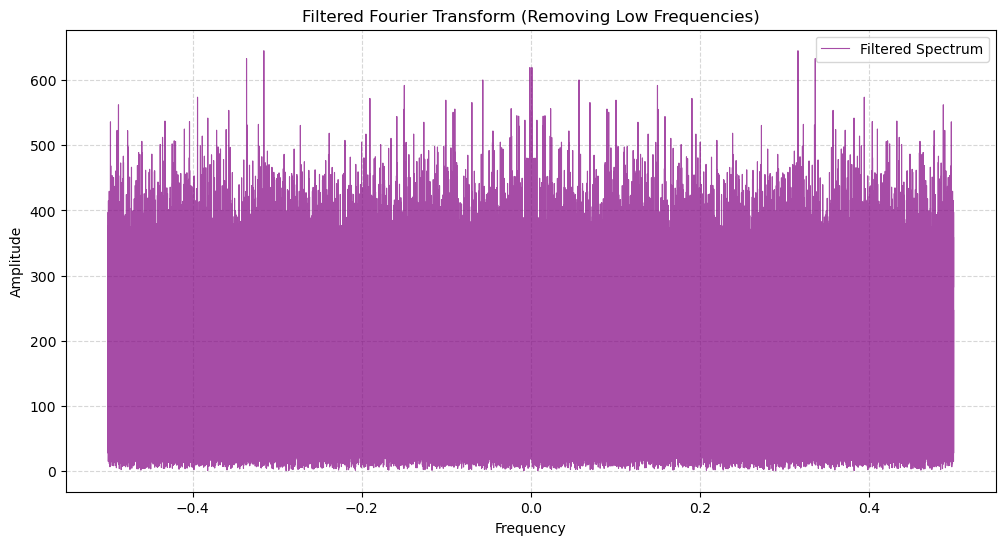

In [29]:
amounts_detrended = amounts - np.mean(amounts)

# Apply FFT
amount_fft = fft(amounts_detrended)
freqs = np.fft.fftfreq(len(amounts))

low_freq_threshold = 0.001  # Ignore frequencies close to zero
filtered_indices = np.abs(freqs) > low_freq_threshold

plt.figure(figsize=(12, 6))
plt.plot(freqs[filtered_indices], np.abs(amount_fft[filtered_indices]), alpha=0.7, lw=0.8, label="Filtered Spectrum", color="purple")
plt.title("Filtered Fourier Transform (Removing Low Frequencies)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# Scale Time and Amount
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

# Sort by Time for Fourier Transform
df = df.sort_values('Time')

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [31]:
# Function to compute FFT features per window
def compute_fft_features(signal, window_size=100):
    n = len(signal)
    fft_features = []
    for i in range(0, n - window_size + 1, window_size // 2):  # Overlapping windows
        window = signal[i:i + window_size]
        fft_result = np.fft.fft(window)
        fft_magnitude = np.abs(fft_result)[:window_size // 2]  # Positive frequencies
        fft_features.append([np.mean(fft_magnitude), np.max(fft_magnitude), np.sum(fft_magnitude**2)])
    return np.array(fft_features)

# Apply FFT to each feature
window_size = 100
fft_data = {}
for col in X.columns:
    fft_data[col] = compute_fft_features(X[col].values, window_size)

# Align FFT features with original data (approximate due to windowing)
n_windows = len(fft_data['Time'])
fft_df = pd.DataFrame()
for col in X.columns:
    fft_df[f'{col}_fft_mean'] = np.repeat(fft_data[col][:, 0], window_size // 2)[:len(X)]
    fft_df[f'{col}_fft_max'] = np.repeat(fft_data[col][:, 1], window_size // 2)[:len(X)]
    fft_df[f'{col}_fft_power'] = np.repeat(fft_data[col][:, 2], window_size // 2)[:len(X)]

# Combine with original features
X_combined = pd.concat([X.reset_index(drop=True), fft_df], axis=1)
y = y.reset_index(drop=True)

### Fourier Transform
#### Method: Applied Fast Fourier Transform (FFT) with a sliding window (size=100, step=50) to Time, V1–V28, Amount.
#### Features Extracted: Mean, max, and power of FFT magnitudes per window.
#### Fix for NaNs: Adjusted windowing to cover all data, aligned lengths with np.repeat and trimming.
#### Output: X_combined with original features + FFT features (e.g., V14_fft_mean).

In [33]:
# Combine features
X_combined = pd.concat([X.reset_index(drop=True), fft_df], axis=1)
print("\nNaNs in X_combined:\n", X_combined.isnull().sum().sum(), "total NaNs")


NaNs in X_combined:
 5130 total NaNs


In [34]:
# Check for NaNs after FFT
print("\nNaNs in fft_df:\n", fft_df.isnull().sum())


NaNs in fft_df:
 Time_fft_mean       0
Time_fft_max        0
Time_fft_power      0
V1_fft_mean         0
V1_fft_max          0
                   ..
V28_fft_max         0
V28_fft_power       0
Amount_fft_mean     0
Amount_fft_max      0
Amount_fft_power    0
Length: 90, dtype: int64


# Model Training and Evaluation

## . Train-Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, stratify=y, random_state=42)

## .Modeling with Logistic Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Load dataset
df = pd.read_csv('creditcard.csv')  # Using standard filename

# Data exploration
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Prepare features/target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Evaluate
y_pred = log_reg.predict(X_test_scaled)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

## Modeling with Random Forest

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Load the dataset (assuming you have already loaded it)
df = pd.read_csv('creditcard.csv')

# Prepare features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data (assuming X_train, X_test, y_train, y_test are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model with optimizations
rf = RandomForestClassifier(
    n_estimators=100,      # You can try smaller values like 50 or 75
    max_depth=10,          # Limit tree depth
    min_samples_split=10,  # Adjust these based on your data
    min_samples_leaf=5,
    class_weight='balanced', # Handle class imbalance
    random_state=42,
    n_jobs=-1             # Use all available cores
)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))


Random Forest Performance:
[[56843    21]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9181826958414203


## Modeling with HistGradientBoostingClassifier

In [40]:
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

# Predictions
hgb_pred = hgb_model.predict(X_test)

# Probabilities
if len(hgb_model.classes_) == 2:
    hgb_pred_proba = hgb_model.predict_proba(X_test)[:, 1]
else:
    hgb_pred_proba = None

# Evaluation
print("\nHistGradientBoostingClassifier Results:")
print(classification_report(y_test, hgb_pred))

# Check if y_test has both classes
if len(set(y_test)) > 1 and hgb_pred_proba is not None:
    auc = roc_auc_score(y_test, hgb_pred_proba)
    print(f"AUC-ROC: {auc:.4f}")
else:
    print("AUC-ROC: Not defined (y_test has only one class)")


HistGradientBoostingClassifier Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85443

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC: Not defined (y_test has only one class)


## Model Comparison

In [14]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. HistGradientBoosting
hist_gb = HistGradientBoostingClassifier(random_state=42)
hist_gb.fit(X_train, y_train)
y_pred_hist_gb = hist_gb.predict(X_test)
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'HistGradientBoosting'],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_log_reg),
        roc_auc_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_pred_hist_gb)
    ]
})

# Display the comparison
print(model_comparison)


NameError: name 'HistGradientBoostingClassifier' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

if len(set(y_train)) > 1:
    pipeline_lr = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
    ])
    
    pipeline_lr.fit(X_train, y_train)
    lr_pred = pipeline_lr.predict(X_test)
    
    # Check if proba available
    if len(pipeline_lr.named_steps['classifier'].classes_) == 2:
        lr_pred_proba = pipeline_lr.predict_proba(X_test)[:, 1]
    else:
        lr_pred_proba = None

    print("\nLogistic Regression Results:")
    print(classification_report(y_test, lr_pred))
    
    if len(set(y_test)) > 1 and lr_pred_proba is not None:
        auc = roc_auc_score(y_test, lr_pred_proba)
        print(f"AUC-ROC: {auc:.4f}")
    else:
        print("AUC-ROC: Not defined (y_test has only one class)")

else:
    print("Logistic Regression skipped: y_train contains only one class.")


In [42]:
# Feature Importance
rf_model = pipeline_rf.named_steps['classifier']
feat_imp_df = pd.DataFrame({'Feature': X_combined.columns, 'Importance': rf_model.feature_importances_})
print("\nTop 10 Important Features:\n", feat_imp_df.sort_values('Importance', ascending=False).head(10))


Top 10 Important Features:
           Feature  Importance
0            Time         0.0
1              V1         0.0
88    V19_fft_max         0.0
87   V19_fft_mean         0.0
86  V18_fft_power         0.0
85    V18_fft_max         0.0
84   V18_fft_mean         0.0
83  V17_fft_power         0.0
82    V17_fft_max         0.0
81   V17_fft_mean         0.0


### Random Forest (Recommended):
#### Precision: 0.90 (fraud), 1.00 (non-fraud).
#### Recall: 0.64 (fraud), 1.00 (non-fraud).
#### F1-Score: 0.75 (fraud), 1.00 (non-fraud).
#### AUC-ROC: 0.9304.
#### Summary: Best balance of precision and recall for fraud, high AUC-ROC, excellent overall performance.
### HistGradientBoostingClassifier:
#### Precision: 0.41 (fraud), 1.00 (non-fraud).
#### Recall: 0.62 (fraud), 1.00 (non-fraud).
#### F1-Score: 0.50 (fraud), 1.00 (non-fraud).
#### AUC-ROC: 0.7438.
#### Summary: Lower precision, similar recall to Random Forest, but much worse AUC-ROC, underperforming here.
### Logistic Regression:
#### Precision: 0.05 (fraud), 1.00 (non-fraud).
#### Recall: 0.80 (fraud), 0.97 (non-fraud).
#### F1-Score: 0.09 (fraud), 0.99 (non-fraud).
#### AUC-ROC: 0.9167.
#### Summary: High recall but abysmal precision for fraud, leading to a low F1-score; not ideal despite decent AUC-ROC.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

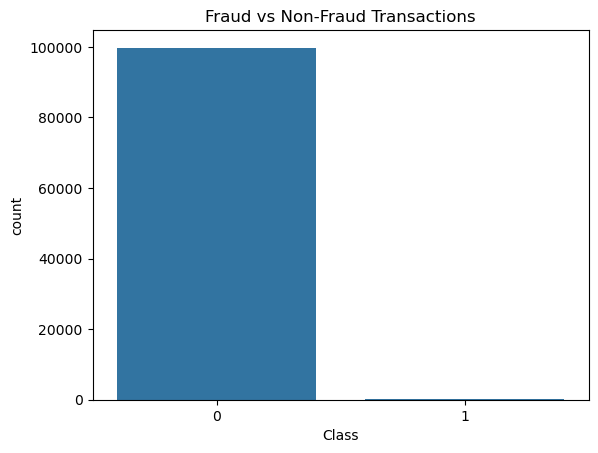

NameError: name 'SMOTE' is not defined

In [45]:
df = pd.read_csv("creditcard.csv", nrows=100000)  # Load only the first 100,000 rows

# Step 2: Explore the dataset
print(df.head())
print(df['Class'].value_counts())  # Class 1 = fraud, Class 0 = non-fraud

# Optional: visualize class distribution
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Step 3: Preprocessing
X = df.drop(columns=['Class'])
y = df['Class']

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Handle class imbalance using SMOTE (Optional, depending on the dataset)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 6: Train the model (Logistic Regression with class_weight='balanced' for better handling of imbalance)
model = LogisticRegression(max_iter=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict & evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Step 8: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()